## Import the libraries

In [85]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression,LinearRegression,Lasso
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, 
VotingClassifier, StackingClassifier)
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score, precision_score,
recall_score, f1_score, cohen_kappa_score, roc_auc_score, roc_curve,r2_score)

from scipy import stats
import warnings
warnings.filterwarnings('ignore')

### Load the Dataset

In [2]:
data = pd.read_csv(r"C:\Users\st203\self projects\car_prices.csv")

In [3]:
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


### Explore the Data 

In [4]:
data.shape

(205, 26)

In [5]:
# Check for Null Values 

data.isnull().sum().sum()

0

In [6]:
# Check the duplicate data 

data.duplicated().sum()

0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
## Statistical summary 
data.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


* The average weight of cars without any passenger and luggage is 2555.57 Lbs.
* The average power of engine is 104.12 HP 
* The average engine size is 126.91 CC

In [9]:
# Unique values in data 

data.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [10]:
# seperate the numerical data 

num_data = data.select_dtypes(np.number)
num_data

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [11]:
cat_data = data.select_dtypes(np.object_)
cat_data

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo 144ea,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo 244dl,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo 246,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [12]:
# Check the variance

num_data.var()

car_ID              3.519167e+03
symboling           1.550789e+00
wheelbase           3.626178e+01
carlength           1.522087e+02
carwidth            4.601900e+00
carheight           5.970800e+00
curbweight          2.711079e+05
enginesize          1.734114e+03
boreratio           7.335631e-02
stroke              9.834309e-02
compressionratio    1.577710e+01
horsepower          1.563741e+03
peakrpm             2.275153e+05
citympg             4.279962e+01
highwaympg          4.742310e+01
price               6.382176e+07
dtype: float64

In [13]:
# Check the standard deviation 

num_data.std()

car_ID                59.322565
symboling              1.245307
wheelbase              6.021776
carlength             12.337289
carwidth               2.145204
carheight              2.443522
curbweight           520.680204
enginesize            41.642693
boreratio              0.270844
stroke                 0.313597
compressionratio       3.972040
horsepower            39.544167
peakrpm              476.985643
citympg                6.542142
highwaympg             6.886443
price               7988.852332
dtype: float64

In [14]:
# Coefficient of variance 

(num_data.std()/num_data.mean())*100

car_ID               57.594723
symboling           149.291169
wheelbase             6.097594
carlength             7.088389
carwidth              3.254856
carheight             4.548213
curbweight           20.374361
enginesize           32.813469
boreratio             8.134040
stroke                9.633090
compressionratio     39.162199
horsepower           37.980483
peakrpm               9.306815
citympg              25.940794
highwaympg           22.394049
price                60.171925
dtype: float64

In [15]:
# correlation of numerical data 

num_data.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


* Variables like engine size, curb weight, horsepower, and car width show a strong positive correlation with price.

In [16]:
# Converting Car_ID into index 

data.set_index('car_ID',inplace=True)

### Exploratory Data Analysis (EDA)

#### Visualization 

univariate analysis

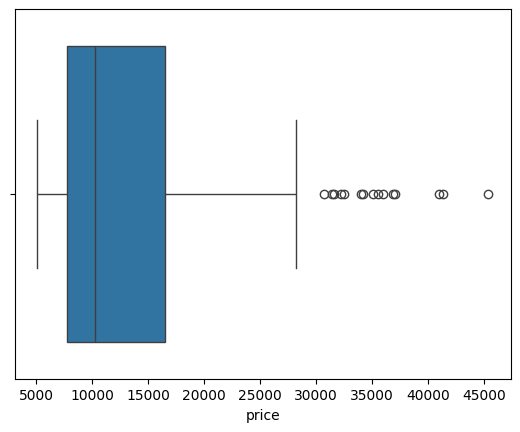

In [17]:
sns.boxplot(data['price'],orient='h')
plt.show()

* The majority of car prices lie between approximately $7,000-22,000.
  
* The median price (black line inside the box) is around $11,000–12,000.

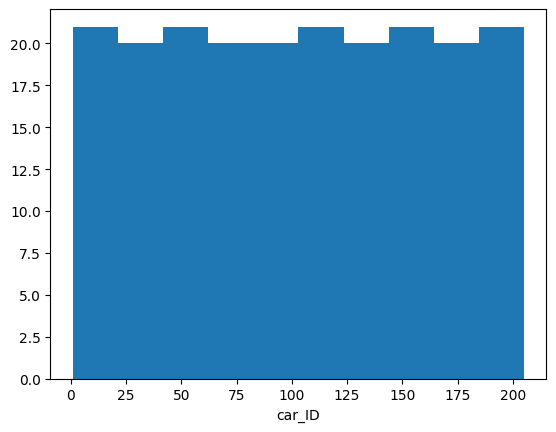

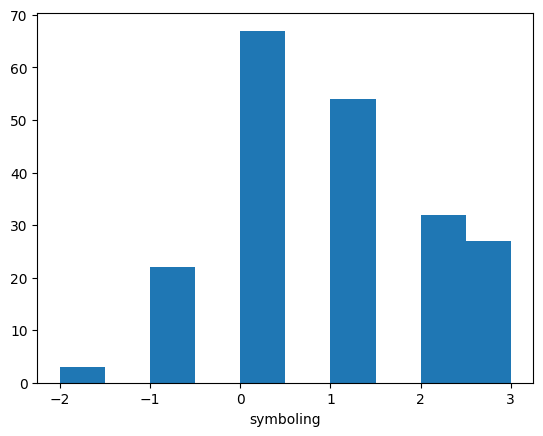

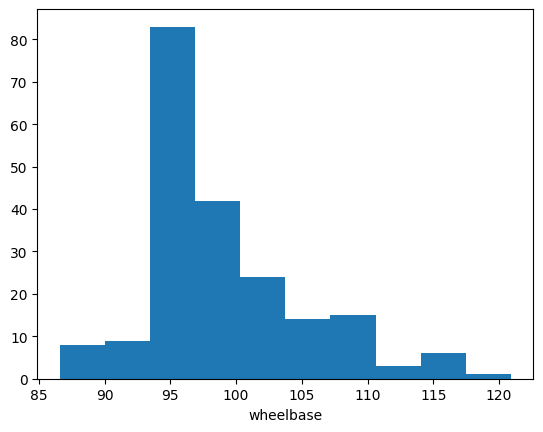

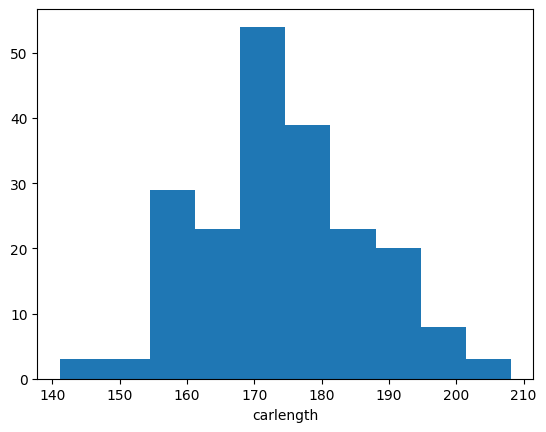

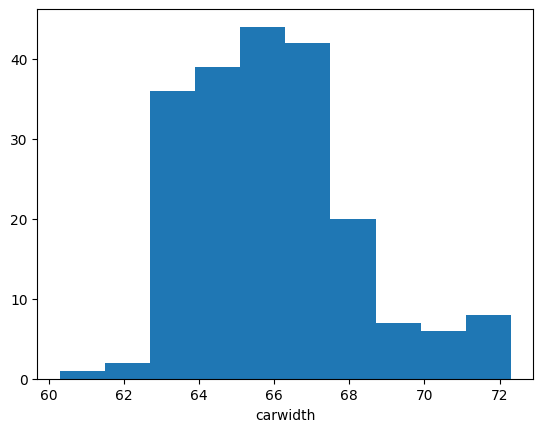

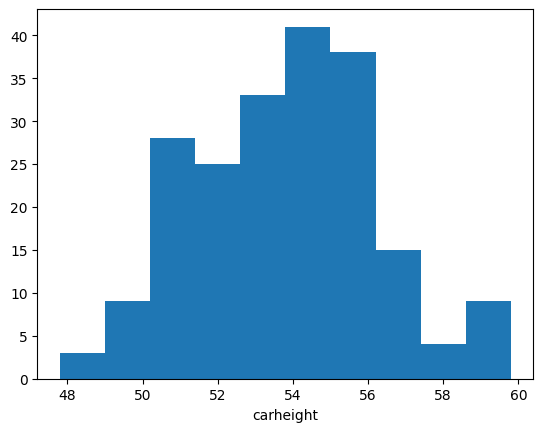

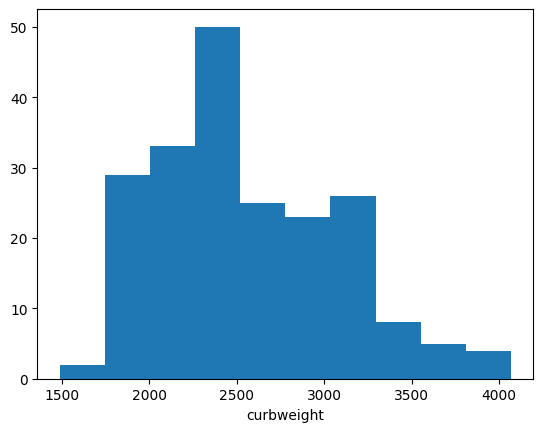

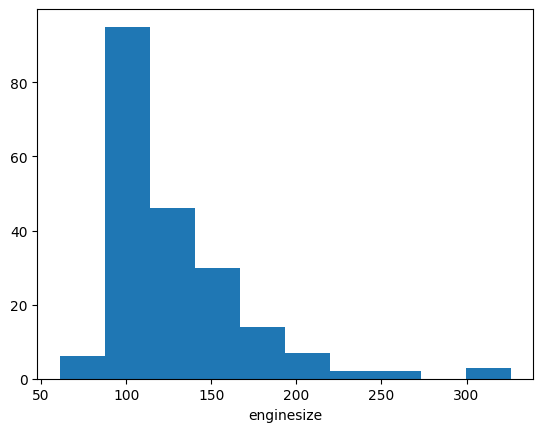

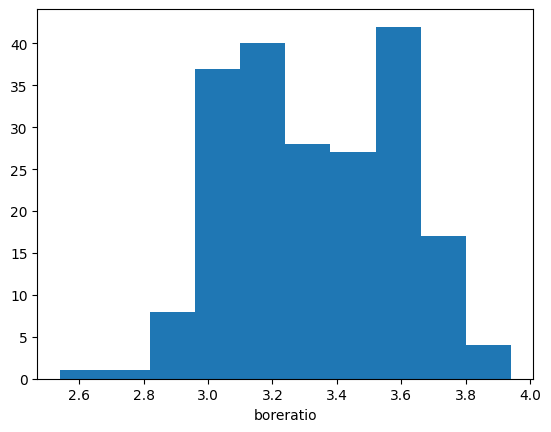

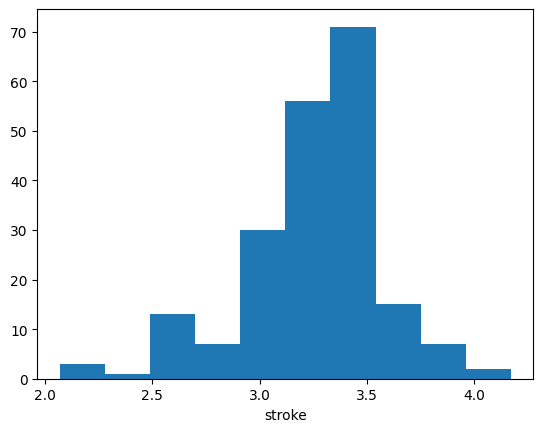

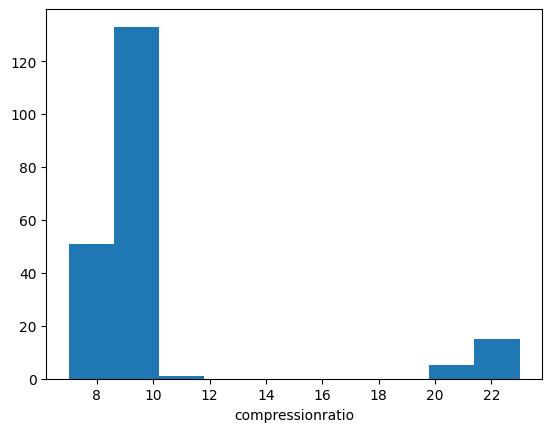

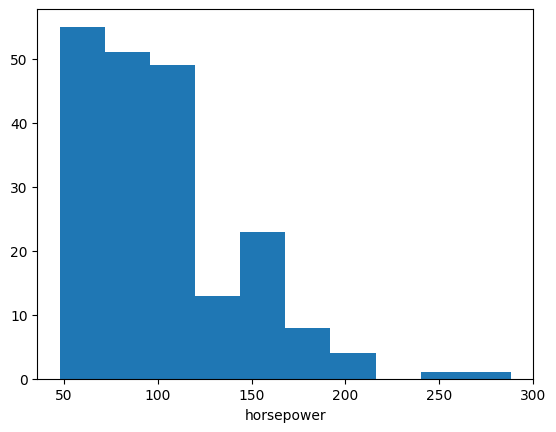

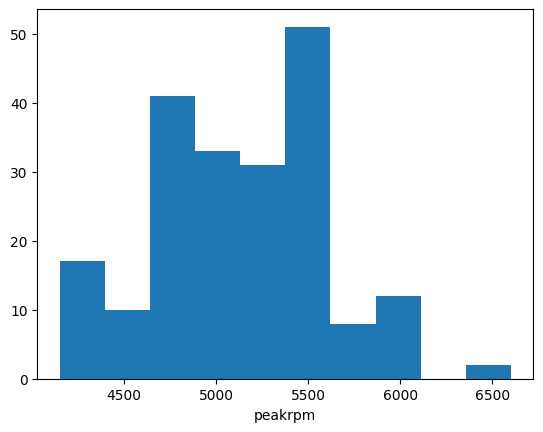

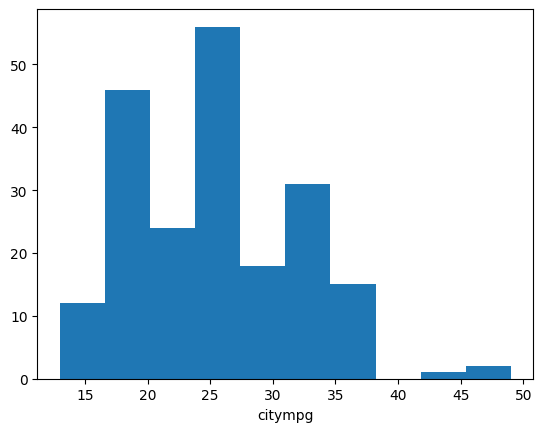

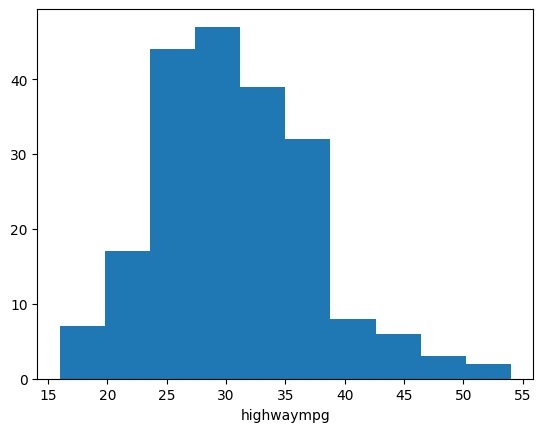

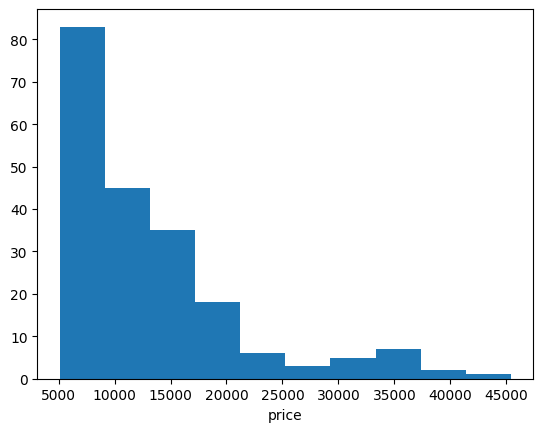

In [18]:
for i in num_data:
    plt.hist(num_data[i])
    plt.xlabel(i)
    plt.show()

for categorical

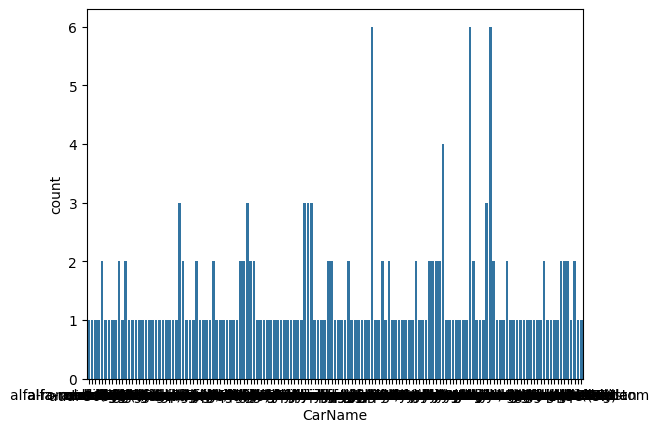

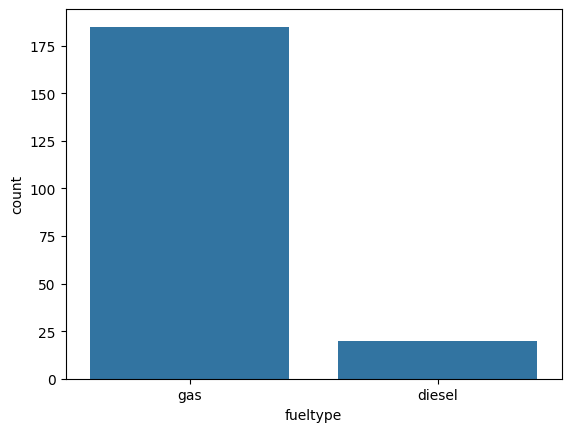

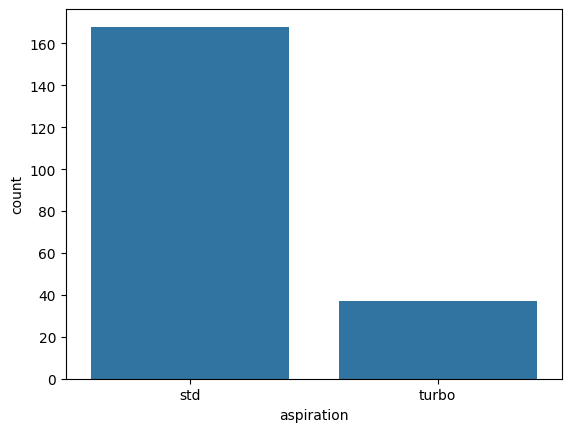

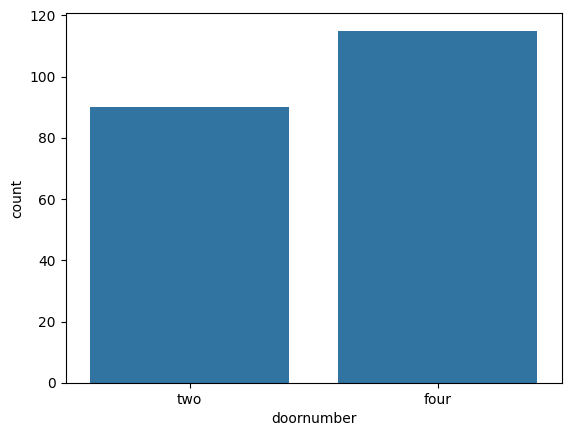

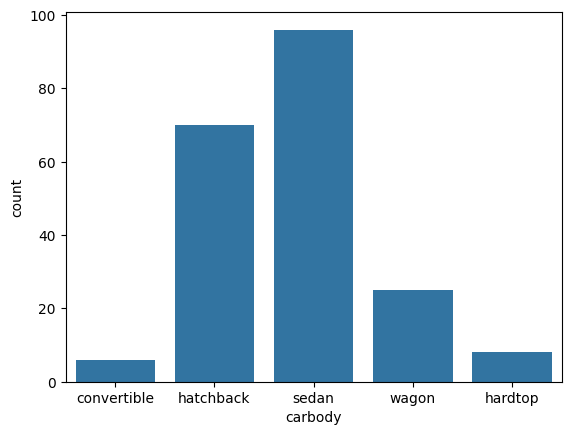

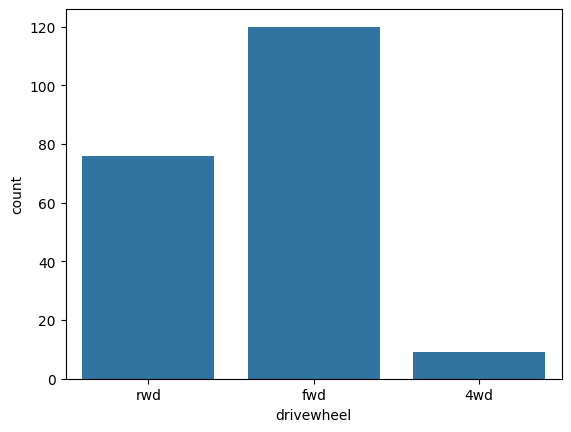

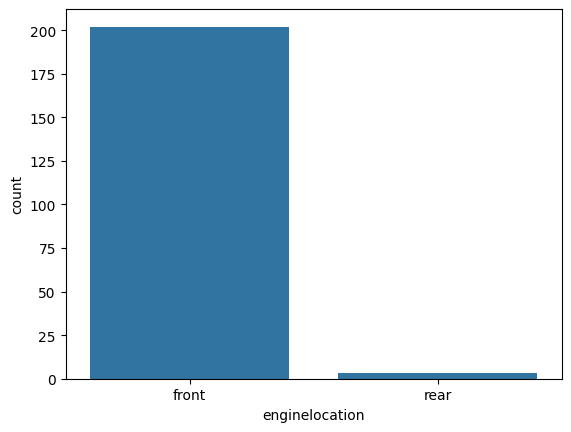

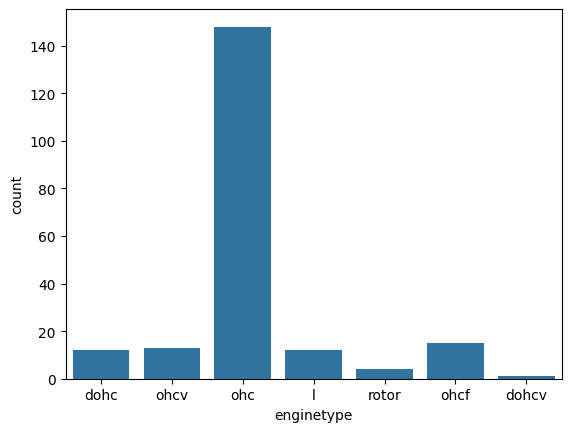

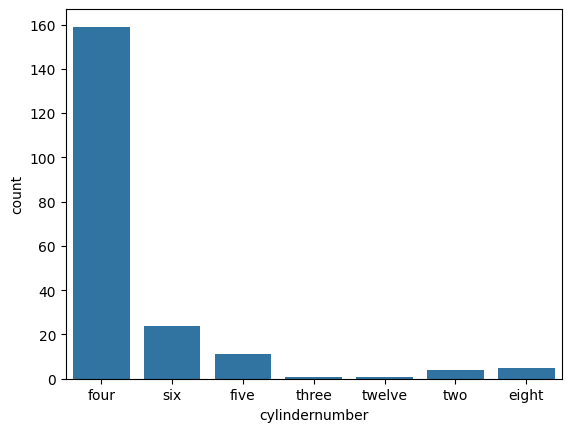

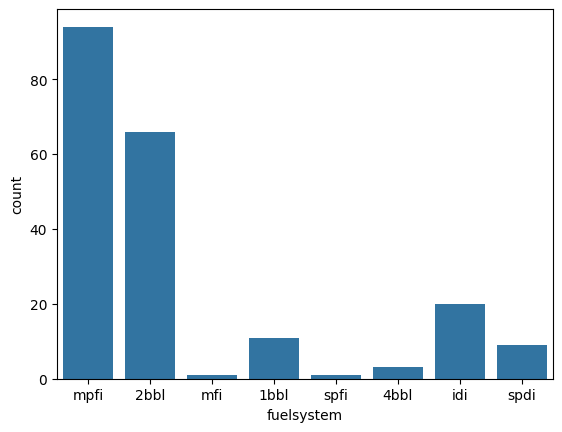

In [19]:
for i in cat_data:
    sns.countplot(data = cat_data, x=i)
    plt.show()

### Bivariate Analysis 

In [20]:
num_cols= ['symboling','wheelbase','enginesize','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

cat_cols= ['CarName', 'fueltype', 'aspiration', 'doornumber','carbody', 'drivewheel', 'enginelocation','enginetype', 'cylindernumber','fuelsystem']

num vs num

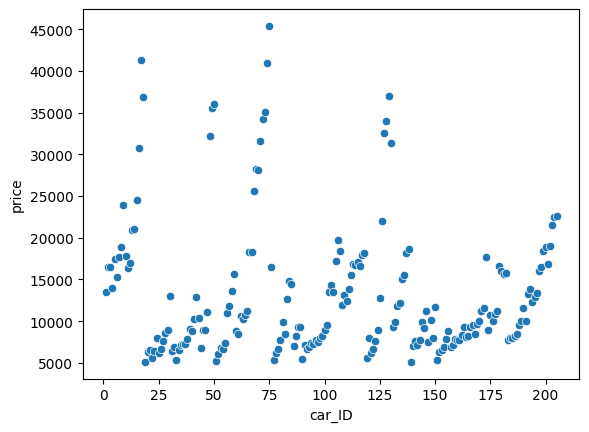

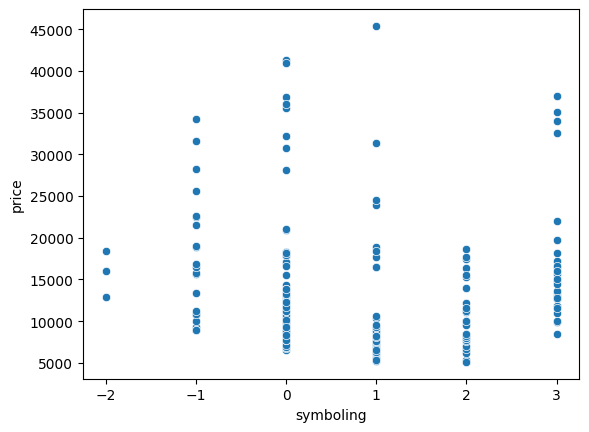

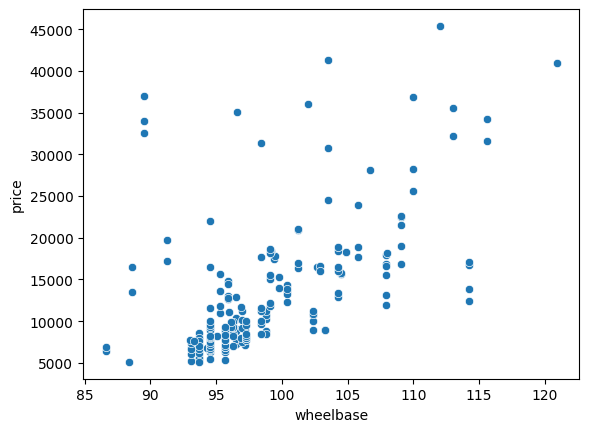

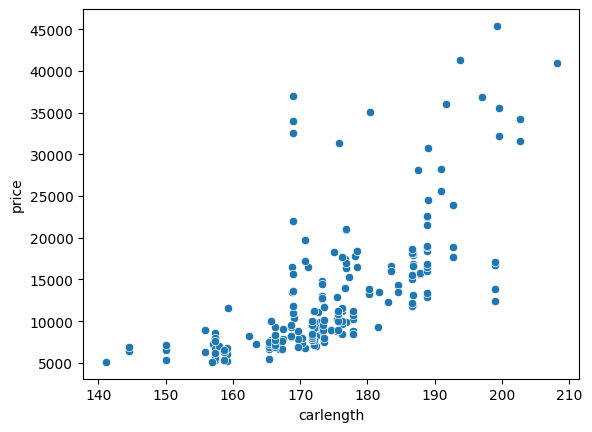

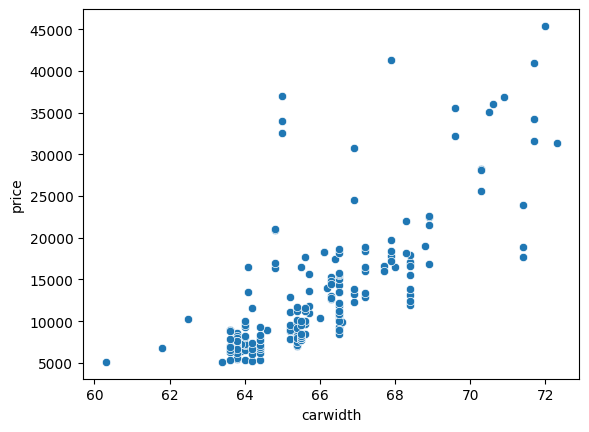

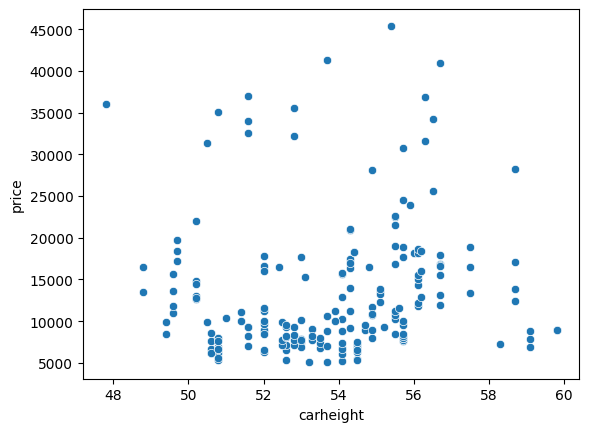

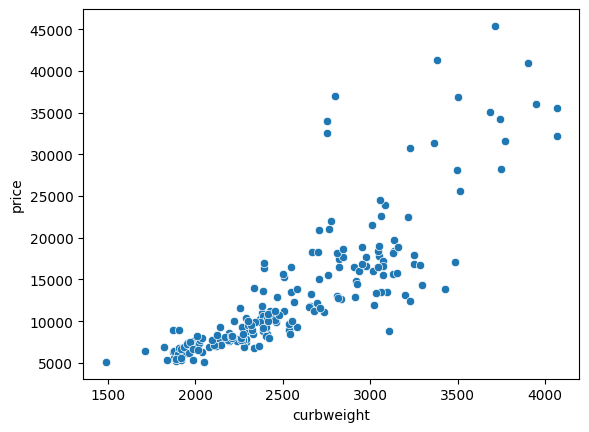

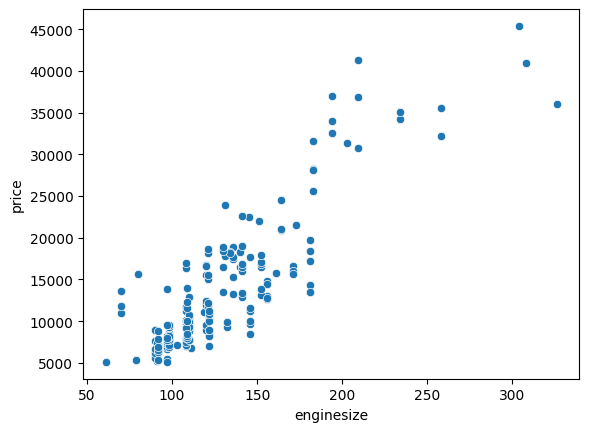

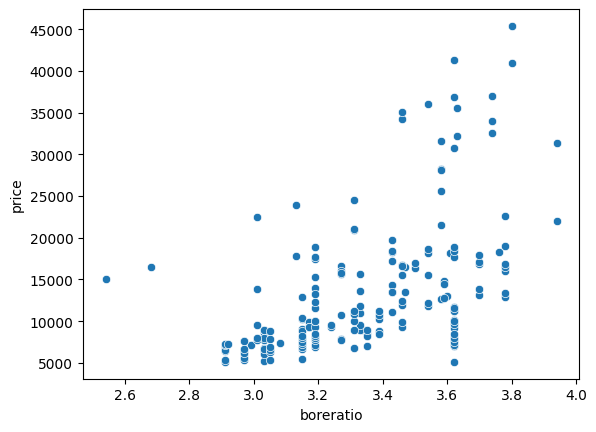

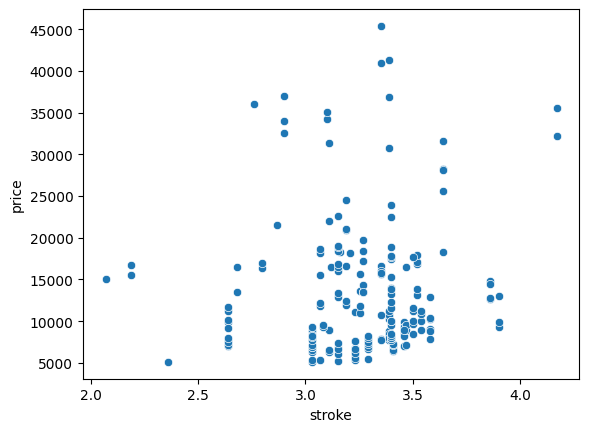

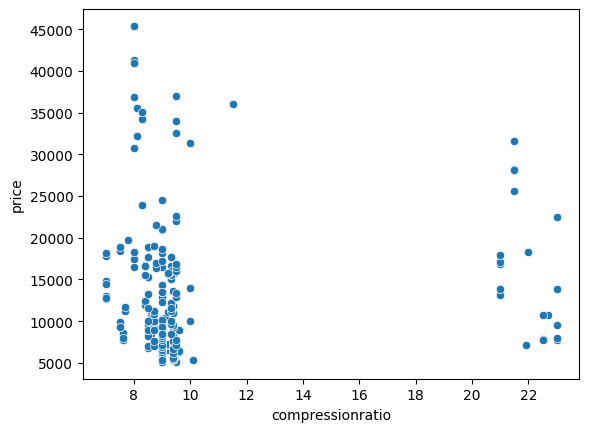

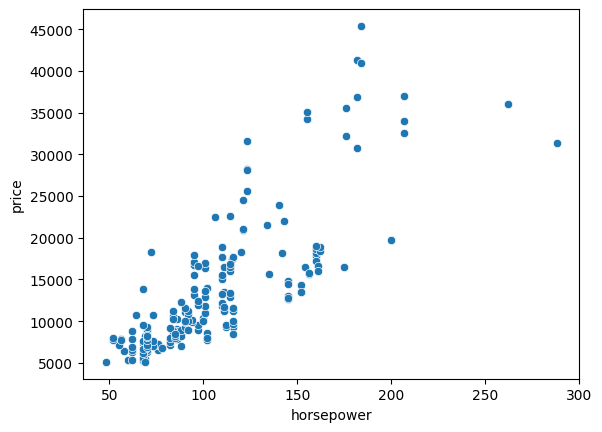

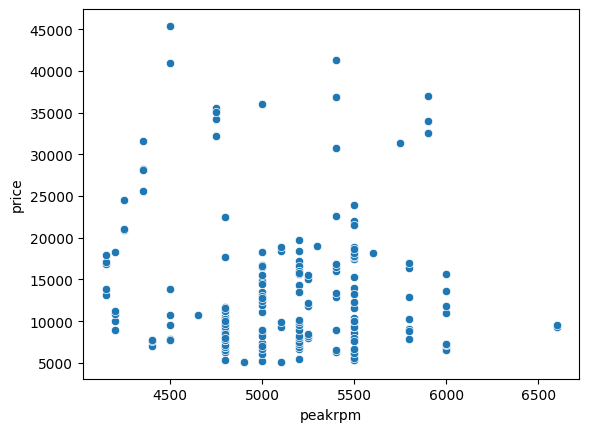

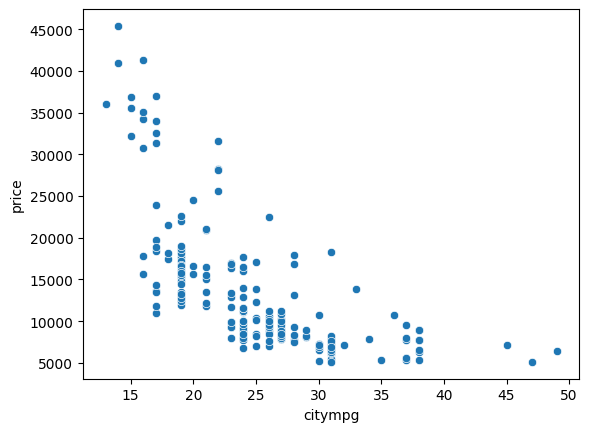

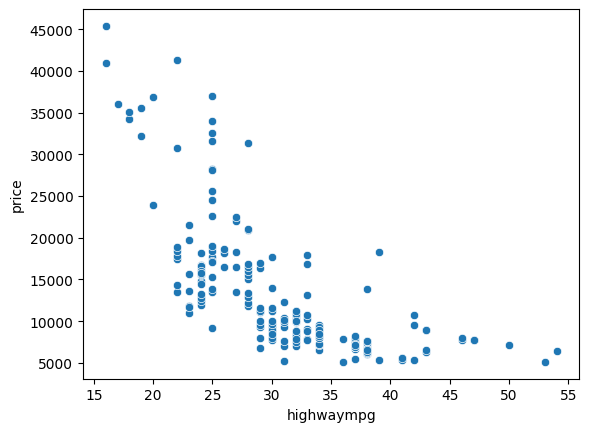

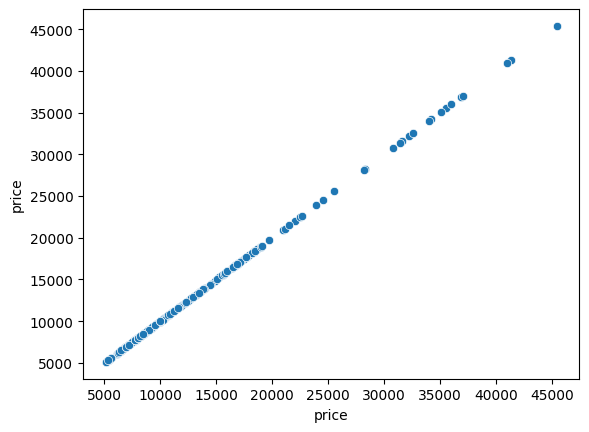

In [21]:
for i in num_data:
    sns.scatterplot(data=num_data,x=i,y='price')
    plt.show()

## Heatmap

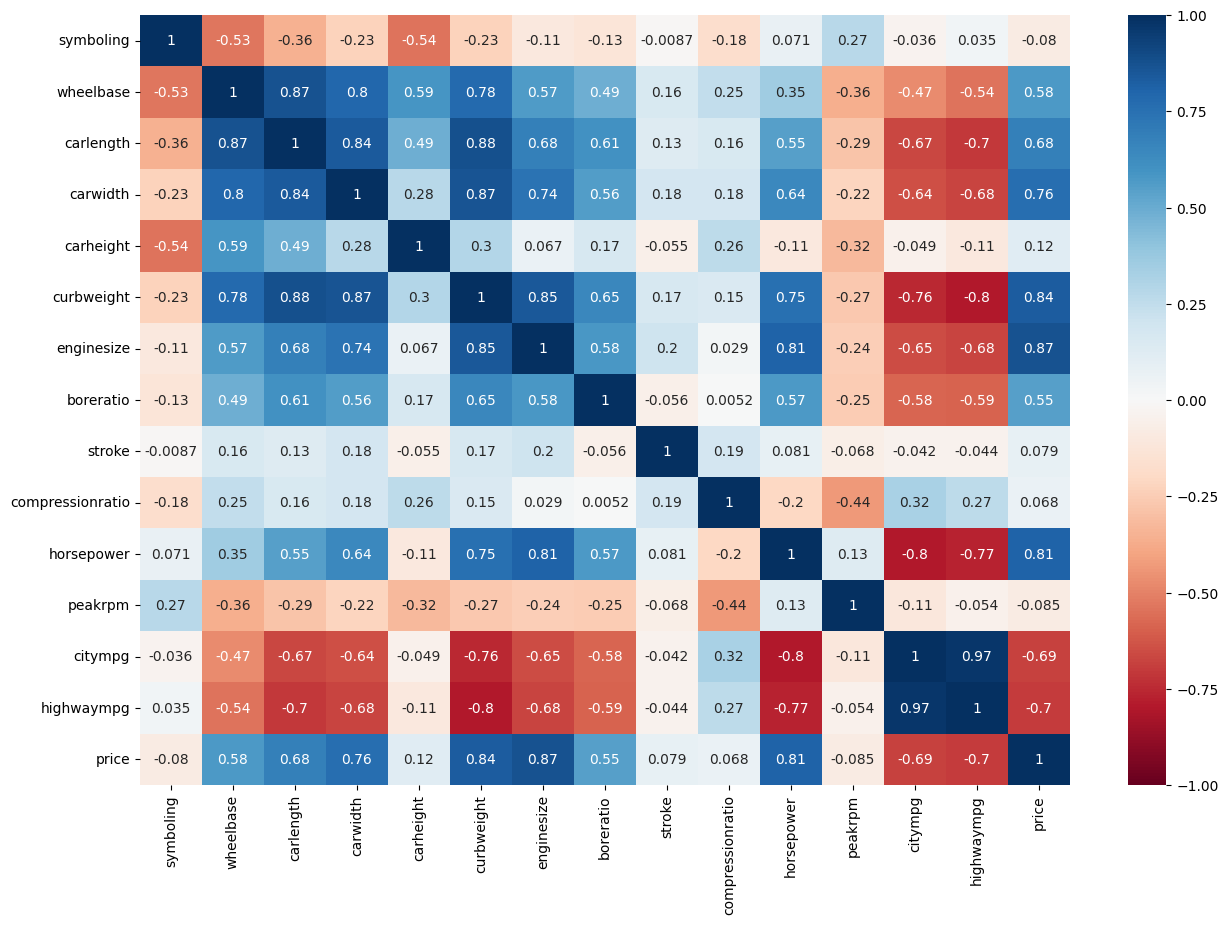

In [22]:
plt.figure(figsize=[15,10])
sns.heatmap(data.corr(numeric_only=True),annot=True,vmax=1,vmin=-1,cmap='RdBu')
plt.show()

* (enginesize, carlength, carwidth, carheight, curbweight) These are highly relevant features for predicting car price.

## Treat the outliers

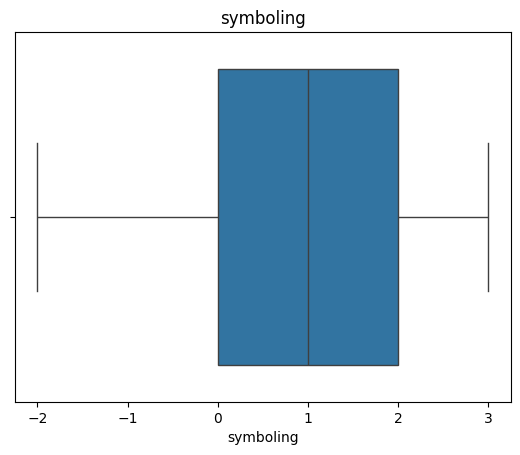

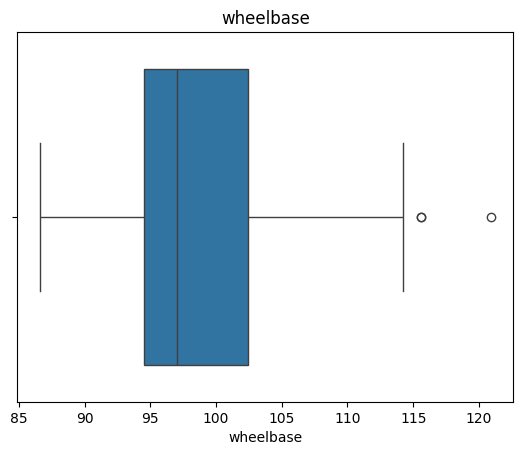

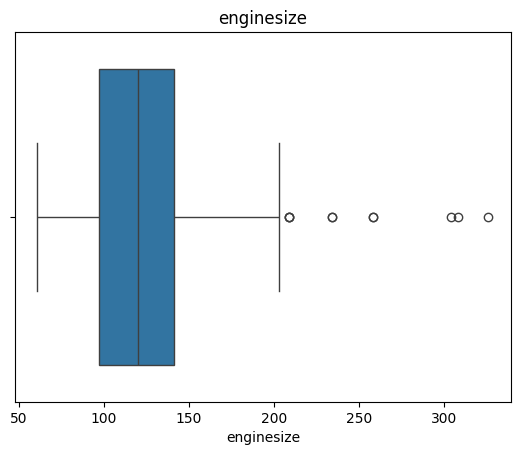

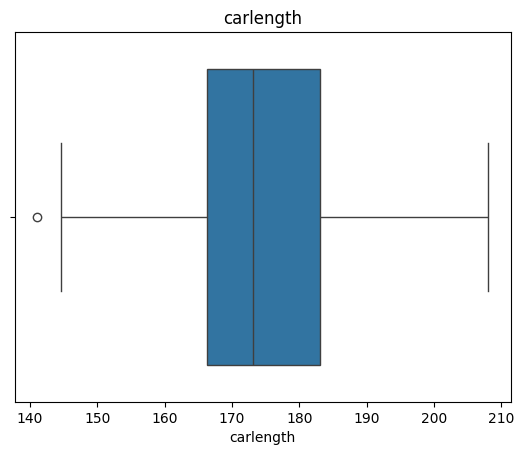

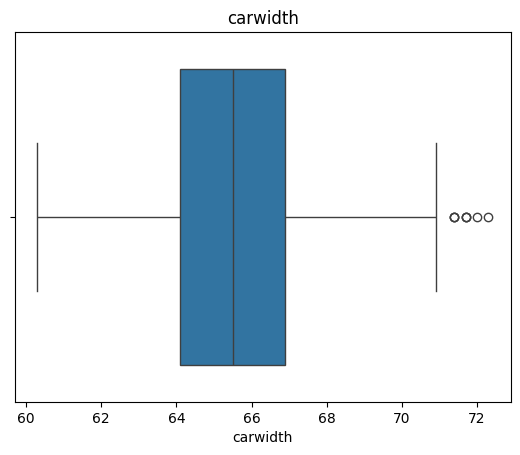

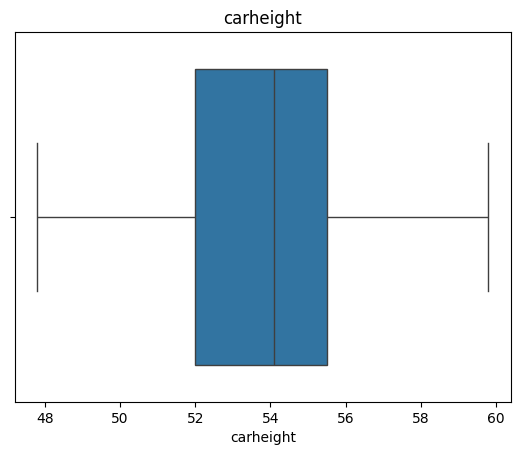

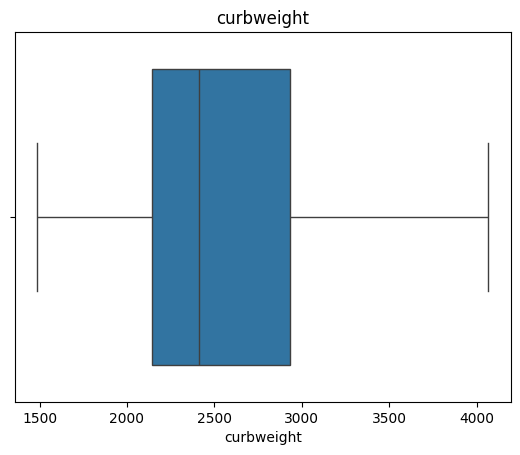

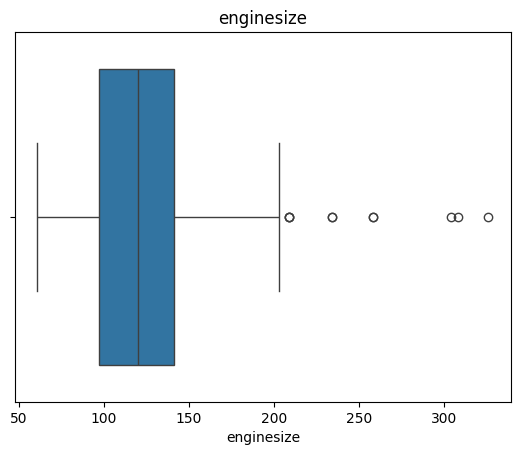

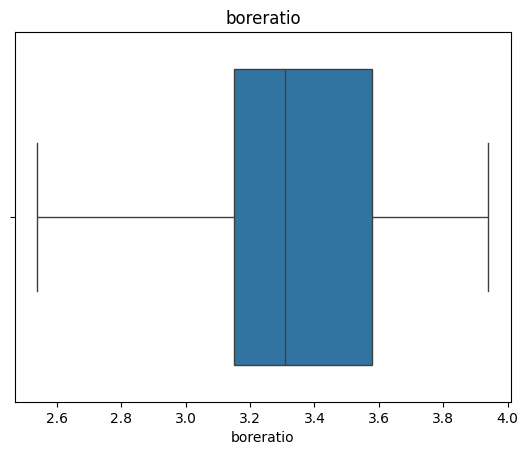

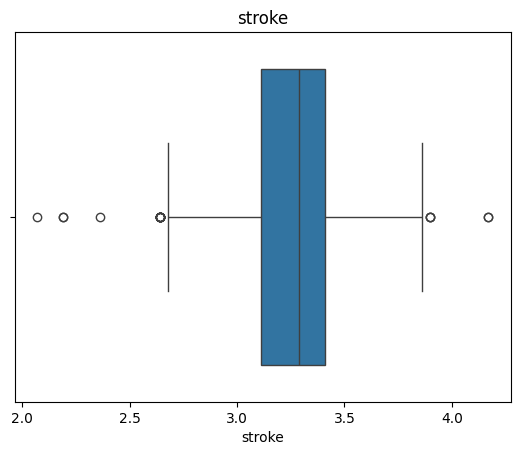

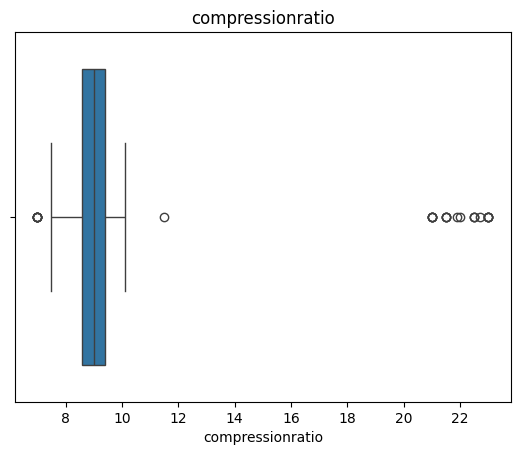

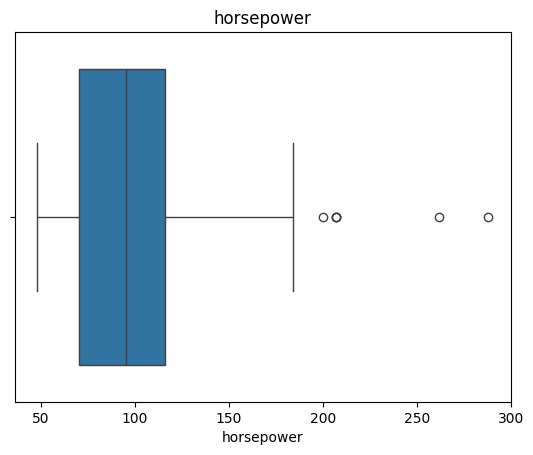

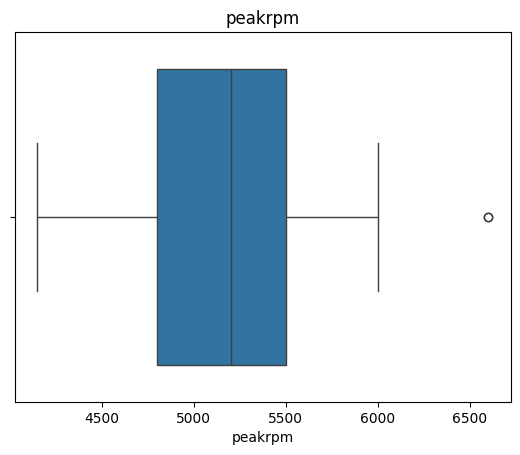

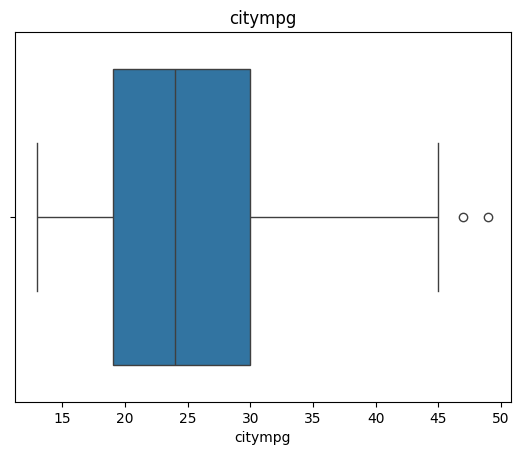

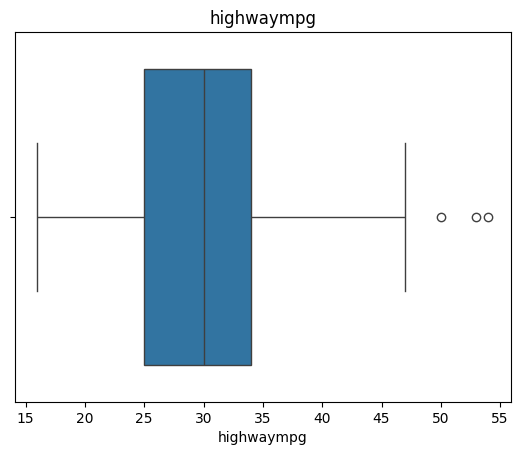

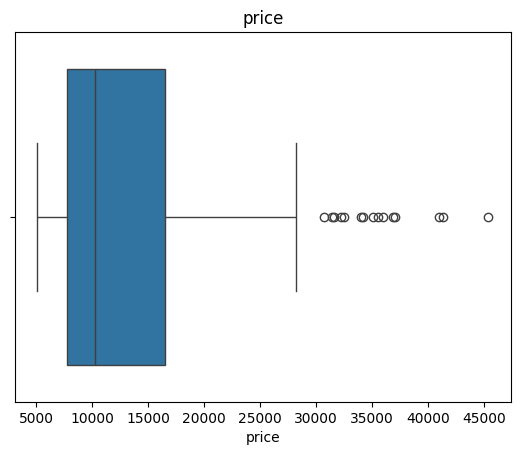

In [23]:
for i in num_cols:
    sns.boxplot(data[i],orient='h')
    plt.title(i)
    plt.show()

* we can see most of the numerical columns has outliers.

In [24]:
for i in num_cols:
    q3,q1= np.percentile(data[i],[75,25])
    iqr = q3-q1
    ul,ll = q3+1.5*iqr , q3-1.5*iqr
    data[i]=data[i].apply(lambda x: ll if x<ll else ul if x>ul else x)

### Encoding

In [29]:
cat_cols

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [30]:
dummies= ['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [31]:
new_data = pd.get_dummies(data, columns=dummies,dtype=int)
new_data

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3.0,90.55,168.8,64.1,50.25,2548.0,130.0,3.470,2.96,9.0,...,0,0,0,0,0,0,0,1,0,0
2,3.0,90.55,168.8,64.1,50.25,2548.0,130.0,3.470,2.96,9.0,...,0,0,0,0,0,0,0,1,0,0
3,1.0,94.50,171.2,65.5,52.40,2823.0,152.0,2.935,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
4,2.0,99.80,176.6,66.2,54.30,2337.0,109.0,3.190,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
5,2.0,99.40,176.6,66.4,54.30,2824.0,136.0,3.190,3.40,8.2,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1.0,109.10,188.8,68.9,55.50,2952.0,141.0,3.780,3.15,9.5,...,0,0,0,0,0,0,0,1,0,0
202,-1.0,109.10,188.8,68.8,55.50,3049.0,141.0,3.780,3.15,8.7,...,0,0,0,0,0,0,0,1,0,0
203,-1.0,109.10,188.8,68.9,55.50,3012.0,173.0,3.580,2.96,8.8,...,0,0,0,0,0,0,0,1,0,0


## Train-test Split

In [48]:
x=new_data.drop(['price'],axis=1)
y=new_data['price']

In [52]:
from sklearn.model_selection import train_test_split

In [74]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size= 0.2, random_state=3)

In [75]:
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(164, 199) (41, 199) (164,) (41,)


## Model Training

### 1.Linear regression 

In [76]:
# loading Linear regression

lin_reg = LinearRegression()

In [77]:
lin_reg.fit(xtrain,ytrain)

LinearRegression()

Model Evaluation 

In [78]:
# prediction on train data

training_data_prediction = lin_reg.predict(xtrain)

In [79]:
# R-Squared error

error_score= metrics.r2_score(ytrain, training_data_prediction)
print("R Squared error : ", error_score)

R Squared error :  0.99831645523801


#### Visualize the actual price and predicted prices

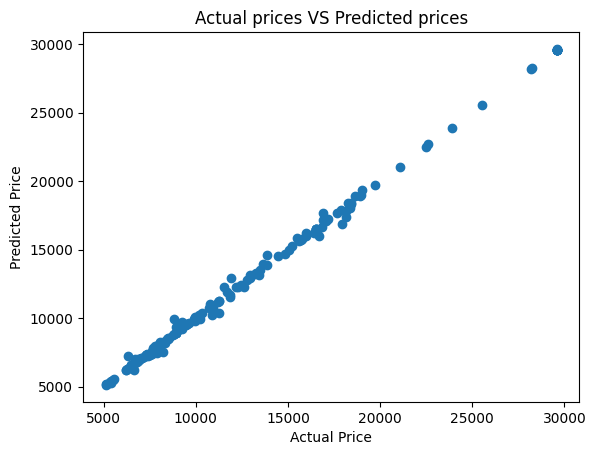

In [81]:
plt.scatter(ytrain, training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual prices VS Predicted prices')
plt.show()

In [82]:
# prediction on test data

test_data_prediction = lin_reg.predict(xtest)

In [83]:
# R-Squared error

error_score= metrics.r2_score(ytest, test_data_prediction)
print("R Squared error : ", error_score)

R Squared error :  0.7370485688511084


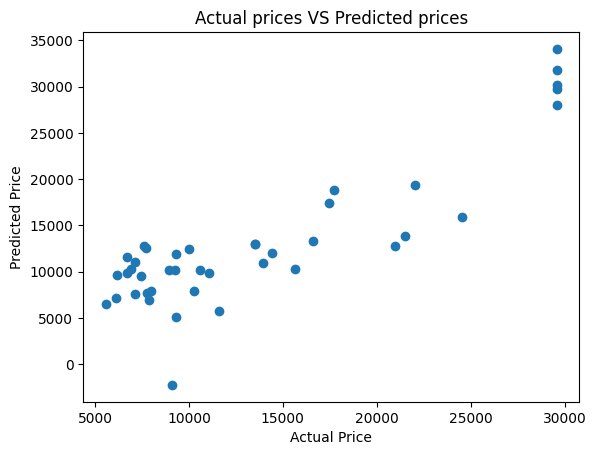

In [84]:
plt.scatter(ytest, test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual prices VS Predicted prices')
plt.show()

#### 2. Lasso Regression 

In [90]:
# loading Linear regression

lasso_reg = Lasso()

In [91]:
lasso_reg.fit(xtrain,ytrain)

Lasso()

Model Evaluation 

In [95]:
# prediction on train data

training_data_prediction = lasso_reg.predict(xtrain)

In [96]:
# R-Squared error

error_score= metrics.r2_score(ytrain, training_data_prediction)
print("R Squared error : ", error_score)

R Squared error :  0.9952403160667497


#### Visualize the actual price and predicted prices

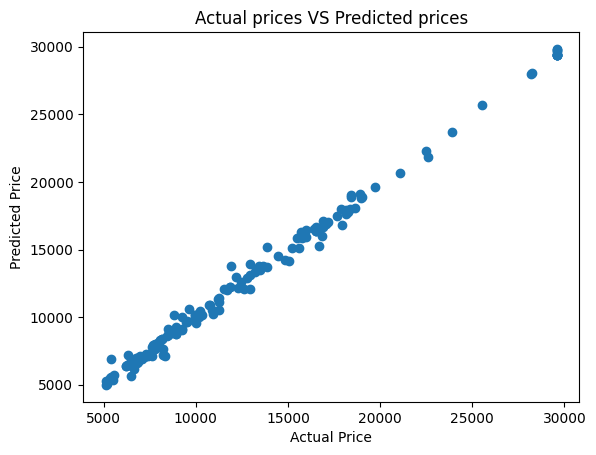

In [97]:
plt.scatter(ytrain, training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual prices VS Predicted prices')
plt.show()

In [98]:
# prediction on test data

test_data_prediction = lasso_reg.predict(xtest)

In [99]:
# R-Squared error

error_score= metrics.r2_score(ytest, test_data_prediction)
print("R Squared error : ", error_score)

R Squared error :  0.8580765733139087


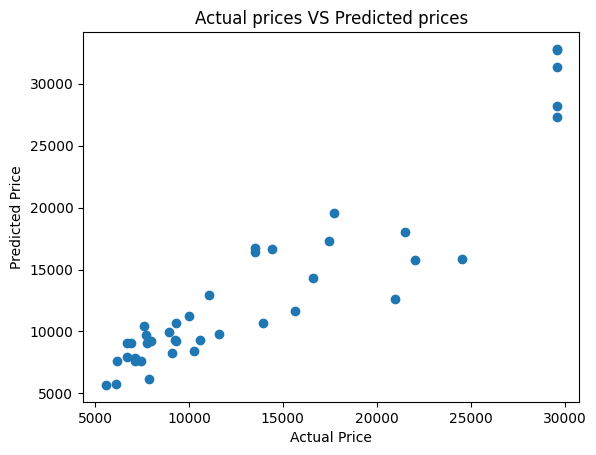

In [100]:
plt.scatter(ytest, test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual prices VS Predicted prices')
plt.show()

In [ ]:
#### 3. XGBOOST regression 